In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/cleaned_nacional.csv')

In [3]:
df.columns

Index(['EDO', 'MES', 'ANIO', 'MPIO', 'HORA', 'MINUTOS', 'DIA', 'DIASEMANA',
       'URBANA', 'SUBURBANA', 'TIPACCID', 'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS',
       'PASCAMION', 'OMNIBUS', 'TRANVIA', 'CAMIONETA', 'CAMION', 'TRACTOR',
       'FERROCARRI', 'MOTOCICLET', 'BICICLETA', 'OTROVEHIC', 'CAUSAACCI',
       'CAPAROD', 'SEXO', 'ALIENTO', 'CINTURON', 'EDAD', 'CONDMUERTO',
       'CONDHERIDO', 'PASAMUERTO', 'PASAHERIDO', 'PEATMUERTO', 'PEATHERIDO',
       'CICLMUERTO', 'CICLHERIDO', 'OTROMUERTO', 'OTROHERIDO', 'TOTMUERTOS',
       'TOTHERIDOS', 'CLASE', 'CALLE1', 'LONGITUD', 'LATITUD'],
      dtype='object')

In [4]:
df.shape

(180219, 46)

**180,219 datos de 46 columnas**, año 2019 únicamente

**Columnas relevantes**:
- TIPACCID (Tipo de accidente):
     - 0: Certificado 0
     - 1: Colisión con vehículo automotor
     - 2: Colisión con peatón (atropellamiento)
     - 3: Colisión con animal
     - 4: Colisión con objeto fijo
     - 5: Volcadura
     - 6: Caída de pasajero
     - 7: Salida del camino
     - 8: Incendio
     - 9: Colisión con ferrocarril
     - 10: Colisión con motocicleta
     - 11: Colisión con ciclista
     - 12: Otro
- CAUSAACCI (Causa probable o presunta del accidente)
    - 1: Conductor 
    - 2: Peatón o pasajero
    - 3: Falla de vehículo
    - 4: Mala condición del camino
    - 5: Otra
- CLASE (Clase del accidente):
     - 1: Fatal
     - 2: No fatal
     - 3: Sólo daños
- CAPAROD (Capa de rodamiento)
    - 1: Pavimentada
    - 2: No pavimentada
- SEXO
    - 1: Se fugó
    - 2: Hombre
    - 3: Mujer
- ALIENTO
    - 4: Sí
    - 5: No
    - 6: Se ignora
- CINTURON
    - 7: Sí
    - 8: No
    - 9: Se ignora
- EDAD
    - 0: Se ignora porque se fugó
    - 99: No especificado

In [5]:
from IPython.display import display, HTML

def create_scrolleable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height: 220px; overflow: auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [6]:
numerical_features = df.select_dtypes(include=[np.number])
summary_stats = numerical_features.describe().T
html_numerical = create_scrolleable_table(summary_stats, 'numerical_features', 'Summary statistics for numerical features')

display(HTML(html_numerical))

,count,mean,std,min,25%,50%,75%,max
EDO,180219.0,16.373285,7.100668,1.00000,11.00000,19.00000,19.00000,32.00000
MES,180219.0,6.545558,3.477758,1.00000,3.00000,7.00000,10.00000,12.00000
ANIO,180219.0,2019.000000,0.000000,2019.00000,2019.00000,2019.00000,2019.00000,2019.00000
MPIO,180219.0,32.148148,30.395565,1.00000,14.00000,26.00000,39.00000,193.00000
HORA,180219.0,12.750037,5.932928,0.00000,8.00000,13.00000,18.00000,23.00000
MINUTOS,180219.0,25.999723,17.756017,0.00000,10.00000,27.00000,40.00000,59.00000
DIA,180219.0,15.630733,8.798444,1.00000,8.00000,15.00000,23.00000,31.00000
DIASEMANA,180219.0,3.972334,1.966724,1.00000,2.00000,4.00000,6.00000,7.00000
URBANA,180219.0,1.019510,0.206587,0.00000,1.00000,1.00000,1.00000,2.00000
SUBURBANA,180219.0,0.026157,0.248610,0.00000,0.00000,0.00000,0.00000,3.00000


In [7]:
df.describe(include=['O'])

,CALLE1
count,180219
unique,22981
top,AVENIDA EUGENIO GARZA SADA
freq,1907


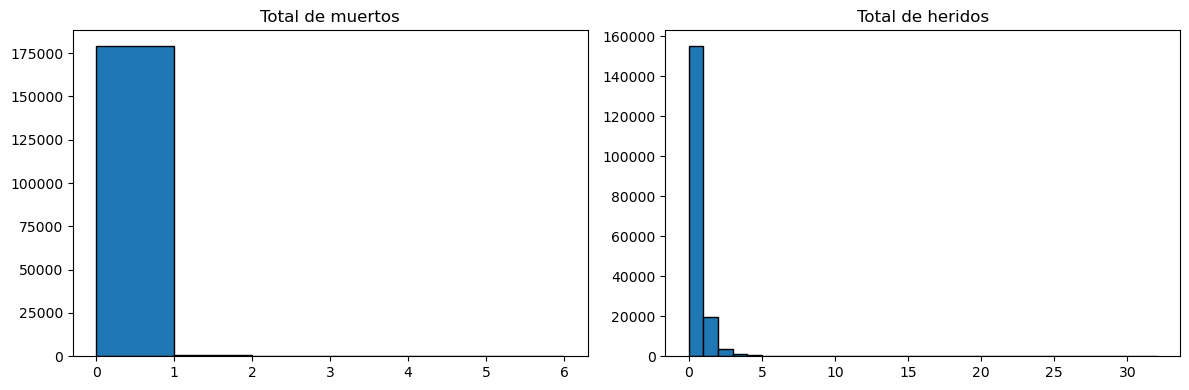

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(df['TOTMUERTOS'], bins=6, edgecolor='black')
axes[0].set_title("Total de muertos")

axes[1].hist(df['TOTHERIDOS'], bins=32, edgecolor='black')
axes[1].set_title("Total de heridos")

plt.tight_layout()
plt.show()

In [9]:
deaths_count = df[(df['CLASE'] == 1) & (df['TOTMUERTOS'] > 0)]
deaths_count = deaths_count.shape[0]
deaths_percentage = (deaths_count / df.shape[0]) * 100

print(f"Cantidad de accidentes fatales: {deaths_count}")
print(f"Accidentes fatales frente al total de accidentes: {deaths_percentage:.4f}%")

Cantidad de accidentes fatales: 1058
Accidentes fatales frente al total de accidentes: 0.5871%


In [10]:
injured_count = df[df['TOTHERIDOS'] > 0]
injured_count = injured_count.shape[0]
injured_percentage = (injured_count / df.shape[0]) * 100

print(f"Cantidad de accidentes con heridos: {injured_count}")
print(f"Accidentes con heridos frente al total de accidentes: {injured_percentage:.4f}%")

Cantidad de accidentes con heridos: 24942
Accidentes con heridos frente al total de accidentes: 13.8398%


In [11]:
edo_counts = df['EDO'].value_counts()
edo_counts = edo_counts.sort_values(ascending=False)

print("Cantidad de Accidentes por Estado:")
print(edo_counts)

Cantidad de Accidentes por Estado:
EDO
19    63134
14    13189
8     10113
9      9948
26     8821
11     7891
22     6746
2      5900
5      5655
28     5550
25     5024
10     4370
15     4166
24     3873
23     3741
30     3094
21     3050
16     2878
1      2681
6      2040
3      1913
4      1765
20     1163
17     1015
29      684
32      586
18      472
7       458
13      299
Name: count, dtype: int64


Para los primeros 5 estados, que corresponden al 58.37% de todos los accidentes en el país, sus identifiacdores corresponden a:
1. **19: Nuevo León**
2. **14: Jalisco**
3. **8: Chihuahua**
4. **9: CDMX**
5. **26: Sonora**

Según el siguiente documento del sitio [gob.mx](https://www.gob.mx/cms/uploads/attachment/file/196925/Atenci_n_especial_2017.pdf).

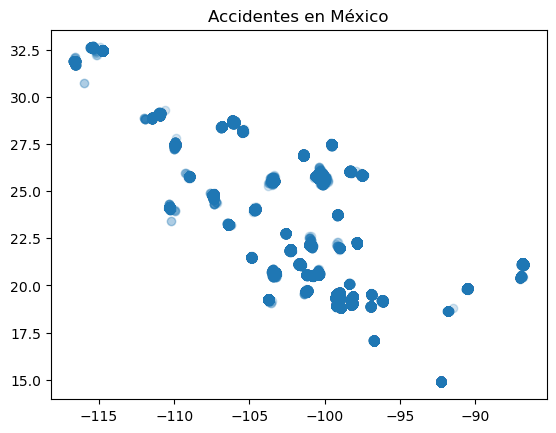

In [12]:
plt.scatter(df['LONGITUD'], df['LATITUD'], alpha=0.2)
plt.title("Accidentes en México")

plt.show()

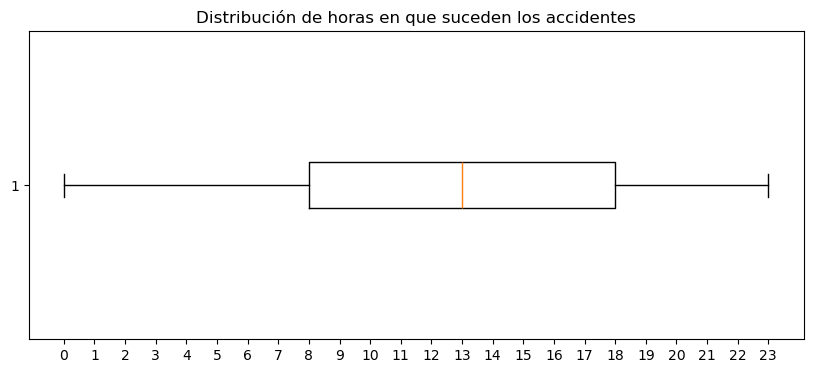

Hora promedio en que ocurrieron los accidentes: 12.75: 


In [13]:
plt.figure(figsize=(10, 4))
plt.boxplot(df['HORA'], vert=False)
plt.xticks(range(0, 24))
plt.title("Distribución de horas en que suceden los accidentes")

plt.show()
print(f"Hora promedio en que ocurrieron los accidentes: {df['HORA'].mean():.2f}: ")

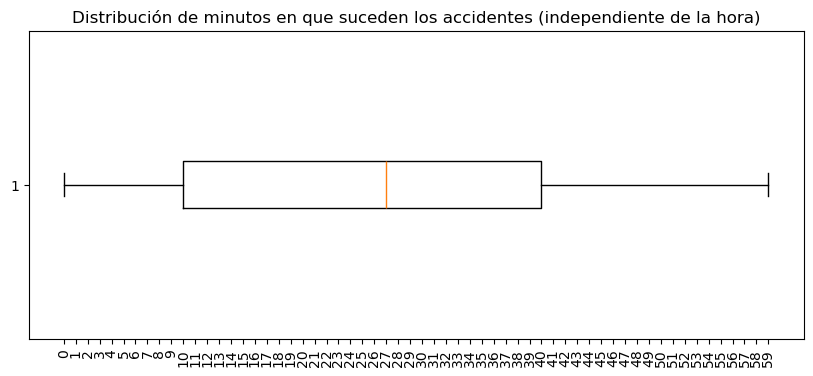

Minutos promedio en que ocurrieron los accidentes: 26.00: 


In [14]:
plt.figure(figsize=(10, 4))
plt.boxplot(df['MINUTOS'], vert=False)
plt.xticks(range(0, 60), rotation=90)
plt.title("Distribución de minutos en que suceden los accidentes (independiente de la hora)")

plt.show()
print(f"Minutos promedio en que ocurrieron los accidentes: {df['MINUTOS'].mean():.2f}: ")

In [15]:
# Agrupación de muertos y heridos por mes, día de la semana y día del mes
death_month = df.groupby('MES')['TOTMUERTOS'].sum()
death_weekday = df.groupby('DIASEMANA')['TOTMUERTOS'].sum()
death_day = df.groupby('DIA')['TOTMUERTOS'].sum()

injured_month = df.groupby('MES')['TOTHERIDOS'].sum()
injured_weekday = df.groupby('DIASEMANA')['TOTHERIDOS'].sum()
injured_day = df.groupby('DIA')['TOTHERIDOS'].sum()

In [16]:
death_month_max = death_month.idxmax()
death_month_min = death_month.idxmin()

death_weekday_max = death_weekday.idxmax()
death_weekday_min = death_weekday.idxmin()

death_day_max = death_day.idxmax()
death_day_min = death_day.idxmin()
# ---
injured_month_max = injured_month.idxmax()
injured_month_min = injured_month.idxmin()

injured_weekday_max = injured_weekday.idxmax()
injured_weekday_min = injured_weekday.idxmin()

injured_day_max = injured_day.idxmax()
injured_day_min = injured_day.idxmin()

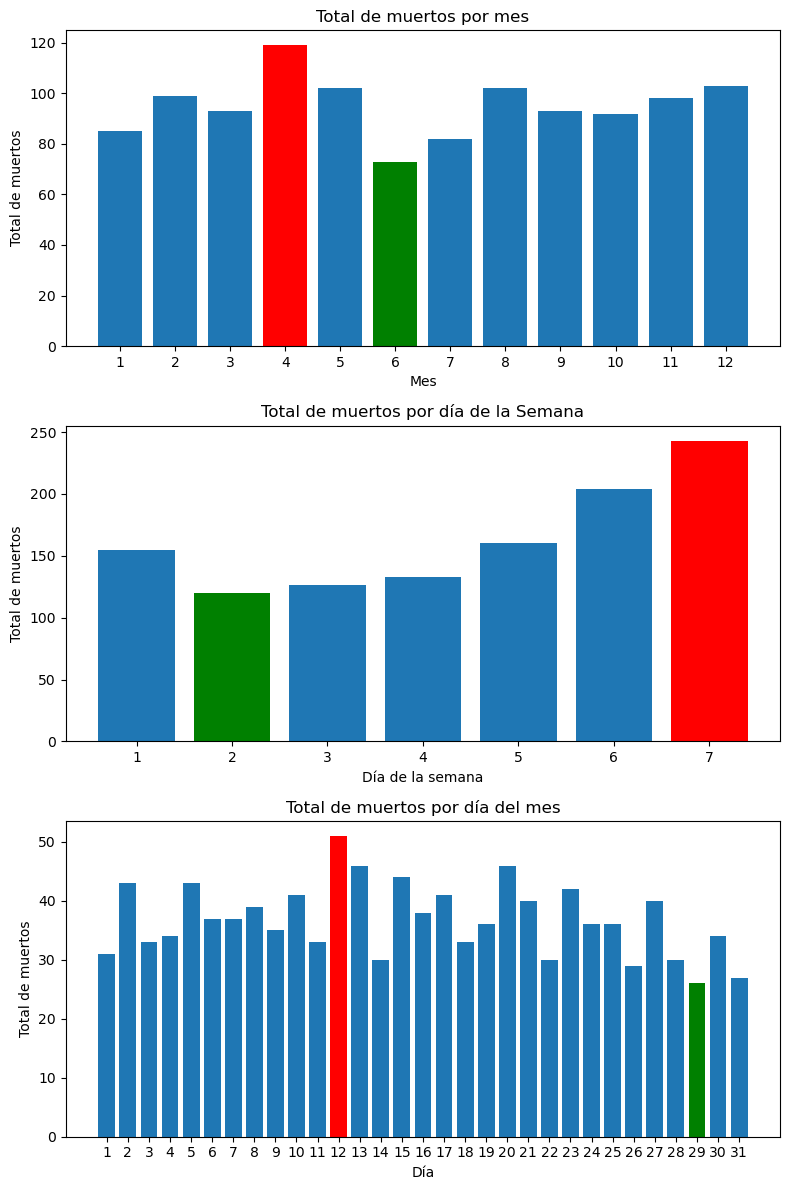

In [17]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

colors = ['red' if i == death_month_max else 'green' if i == death_month_min else 'C0' for i in death_month.index]
axes[0].bar(death_month.index, death_month.values, color=colors)
axes[0].set_title('Total de muertos por mes')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Total de muertos')
axes[0].set_xticks(range(1, 13))

colors = ['red' if i == death_weekday_max else 'green' if i == death_weekday_min else 'C0' for i in death_weekday.index]
axes[1].bar(death_weekday.index, death_weekday.values, color=colors)
axes[1].set_title('Total de muertos por día de la Semana')
axes[1].set_xlabel('Día de la semana')
axes[1].set_ylabel('Total de muertos')
axes[1].set_xticks(range(1, 8))

colors = ['red' if i == death_day_max else 'green' if i == death_day_min else 'C0' for i in death_day.index]
axes[2].bar(death_day.index, death_day.values, color=colors)
axes[2].set_title('Total de muertos por día del mes')
axes[2].set_xlabel('Día')
axes[2].set_ylabel('Total de muertos')
axes[2].set_xticks(range(1, 32))

plt.tight_layout()
plt.show()

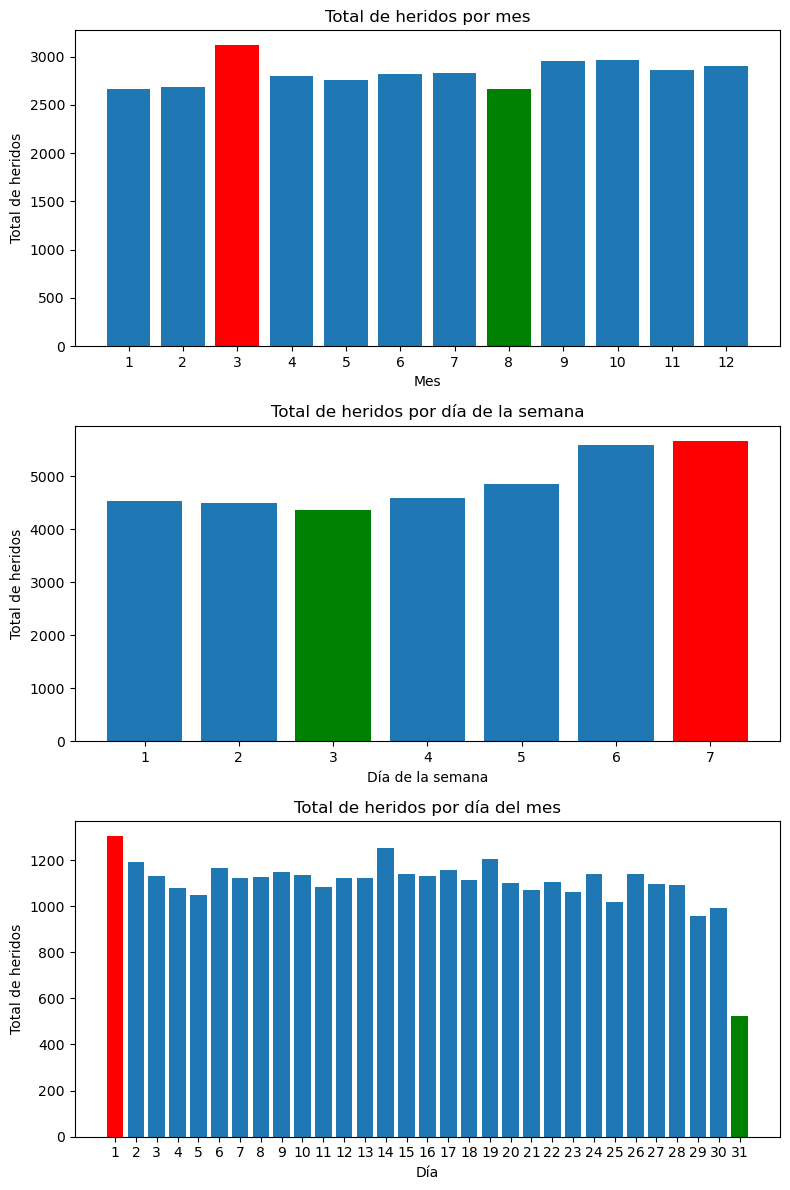

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12))

colors = ['red' if i == injured_month_max else 'green' if i == injured_month_min else 'C0' for i in injured_month.index]
axes[0].bar(injured_month.index, injured_month.values, color=colors)
axes[0].set_title('Total de heridos por mes')
axes[0].set_xlabel('Mes')
axes[0].set_ylabel('Total de heridos')
axes[0].set_xticks(range(1, 13))

colors = ['red' if i == injured_weekday_max else 'green' if i == injured_weekday_min else 'C0' for i in injured_weekday.index]
axes[1].bar(injured_weekday.index, injured_weekday.values, color=colors)
axes[1].set_title('Total de heridos por día de la semana')
axes[1].set_xlabel('Día de la semana')
axes[1].set_ylabel('Total de heridos')
axes[1].set_xticks(range(1, 8))

colors = ['red' if i == injured_day_max else 'green' if i == injured_day_min else 'C0' for i in injured_day.index]
axes[2].bar(injured_day.index, injured_day.values, color=colors)
axes[2].set_title('Total de heridos por día del mes')
axes[2].set_xlabel('Día')
axes[2].set_ylabel('Total de heridos')
axes[2].set_xticks(range(1, 32))

plt.tight_layout()
plt.show()

In [19]:
print(f"Promedio de muertos por mes: {death_month.mean()}")
print(f"Promedio de heridos por mes: {injured_month.mean()}\n")

print(f"Promedio de muertos por día de la semana: {death_weekday.mean()}")
print(f"Promedio de heridos por día de la semana: {injured_weekday.mean()}\n")

print(f"Promedio de muertos por día del mes: {death_day.mean()}")
print(f"Promedio de heridos por día del mes: {injured_day.mean()}")

Promedio de muertos por mes: 95.08333333333333
Promedio de heridos por mes: 2838.0

Promedio de muertos por día de la semana: 163.0
Promedio de heridos por día de la semana: 4865.142857142857

Promedio de muertos por día del mes: 36.806451612903224
Promedio de heridos por día del mes: 1098.5806451612902


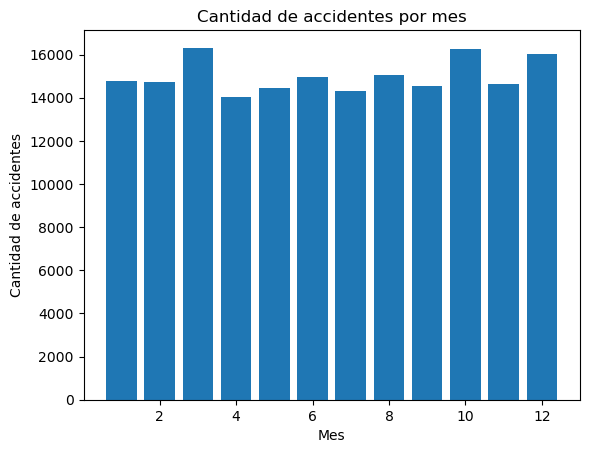


Promedio de accidentes por mes: 15018.25


In [49]:
accidents_month = df['MES'].value_counts().sort_index()

plt.bar(accidents_month.index, accidents_month.values)
plt.title("Cantidad de accidentes por mes")
plt.xlabel("Mes")
plt.ylabel("Cantidad de accidentes")

plt.show()

print(f"\nPromedio de accidentes por mes: {accidents_month.mean():.2f}")

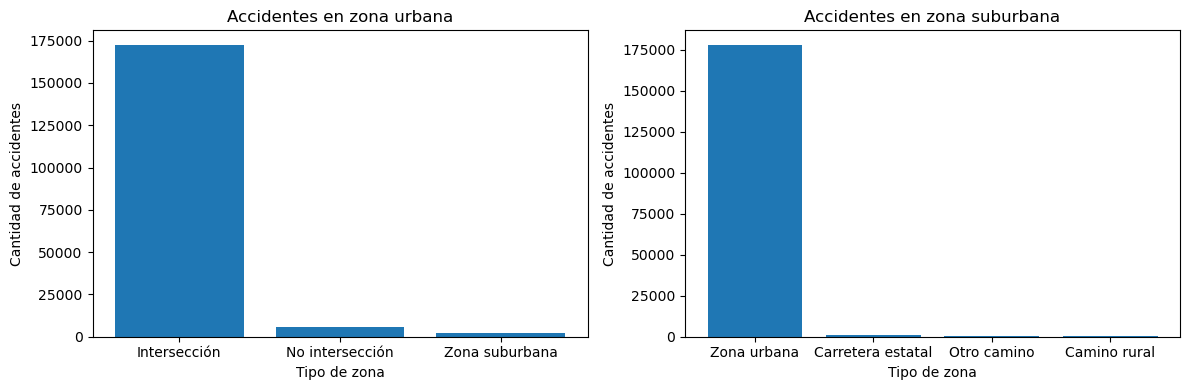

In [20]:
urbana_mapping = {0: 'Zona suburbana', 1: 'Intersección', 2: 'No intersección'}
urbana_counts = df['URBANA'].map(urbana_mapping).value_counts()

suburbana_mapping = {0: 'Zona urbana', 1: 'Camino rural', 2: 'Carretera estatal', 3: 'Otro camino'}
suburbana_counts = df['SUBURBANA'].map(suburbana_mapping).value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].bar(urbana_counts.index, urbana_counts.values)
ax[0].set_title("Accidentes en zona urbana")
ax[0].set_xlabel("Tipo de zona")
ax[0].set_ylabel("Cantidad de accidentes")

ax[1].bar(suburbana_counts.index, suburbana_counts.values)
ax[1].set_title("Accidentes en zona suburbana")
ax[1].set_xlabel("Tipo de zona")
ax[1].set_ylabel("Cantidad de accidentes")

plt.tight_layout()
plt.show()

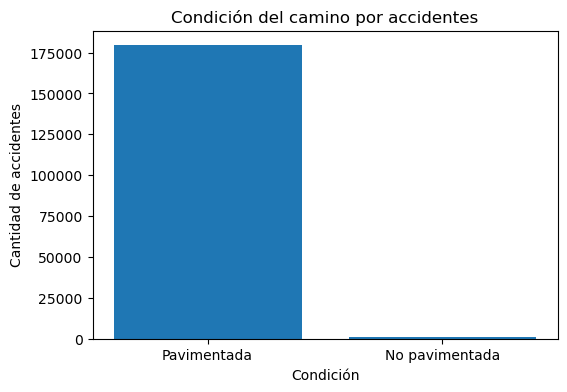

In [21]:
caparod_mapping = {1: 'Pavimentada', 2: 'No pavimentada'}
caparod_counts = df['CAPAROD'].map(caparod_mapping).value_counts()

plt.figure(figsize=(6, 4))
plt.bar(caparod_counts.index, caparod_counts.values)
plt.title("Condición del camino por accidentes")
plt.xlabel("Condición")
plt.ylabel("Cantidad de accidentes")

plt.show()

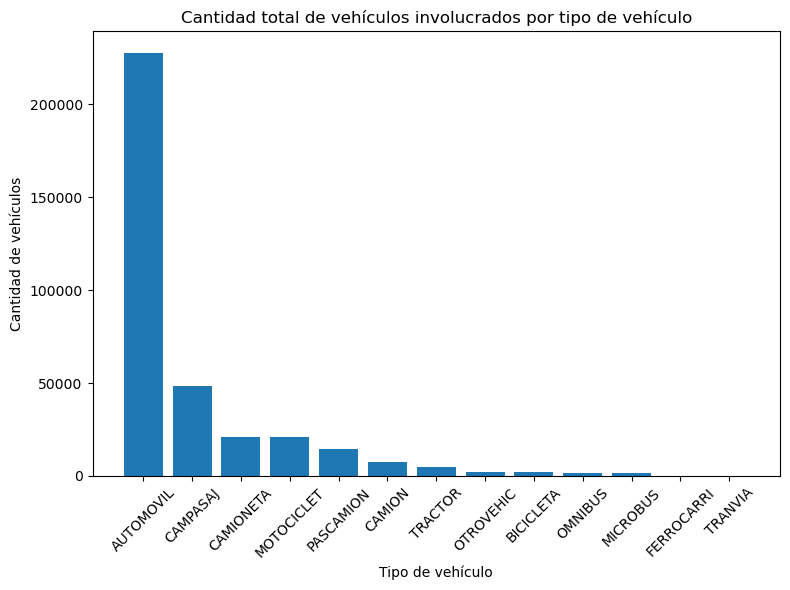

In [22]:
type_vehicle = df[[
    'AUTOMOVIL', 'CAMPASAJ', 'MICROBUS', 'PASCAMION', 'OMNIBUS', 'TRANVIA', 'CAMIONETA', 
    'CAMION', 'TRACTOR', 'FERROCARRI', 'MOTOCICLET', 'BICICLETA', 'OTROVEHIC'
]]

tot_vehicle = type_vehicle.sum()
tot_vehicle = tot_vehicle.sort_values(ascending=False)

plt.figure(figsize=(8, 6))
plt.bar(tot_vehicle.index, tot_vehicle.values)

plt.title('Cantidad total de vehículos involucrados por tipo de vehículo')
plt.xlabel('Tipo de vehículo')
plt.ylabel('Cantidad de vehículos')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Esta es la cantidad total de vehículos involucrados en **todos** los accidentes ocurridos. En un solo accidente, puede haber más de un vehículo del mismo tipo o involucrar diferentes tipos de vehículos.

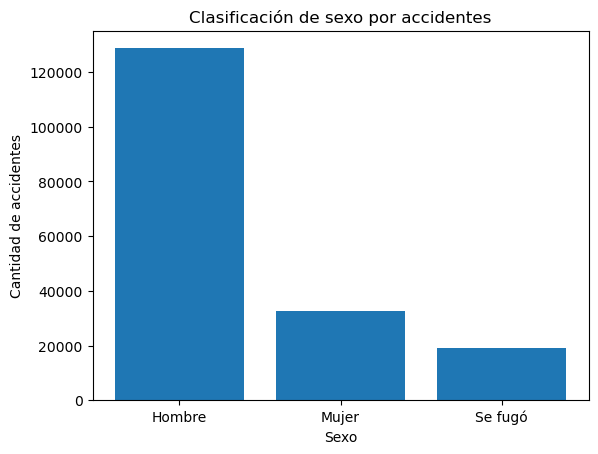

In [23]:
sexo_mapping = {1: 'Se fugó', 2: 'Hombre', 3: 'Mujer'}
sexo_counts = df['SEXO'].map(sexo_mapping).value_counts()

plt.bar(sexo_counts.index, sexo_counts.values)
plt.title("Clasificación de sexo por accidentes")
plt.xlabel("Sexo")
plt.ylabel("Cantidad de accidentes")

plt.show()

In [24]:
sexo_percentage = (sexo_counts/df.shape[0])*100

for index, value in sexo_percentage.items():
    print(f"{index}: {value:.2f}%")

Hombre: 71.40%
Mujer: 18.09%
Se fugó: 10.51%


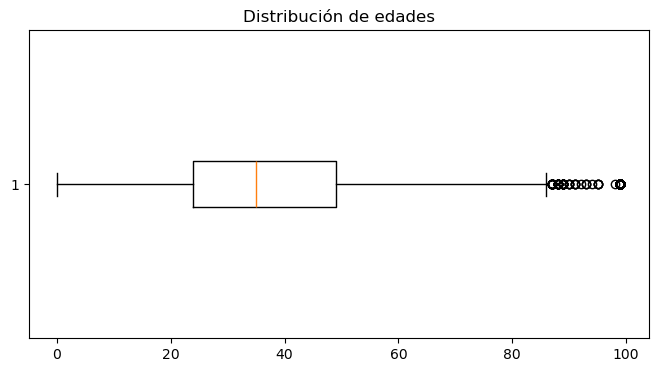

Primer cuartil (Q1): 24.0
Mediana (Q2): 35.0
Tercer cuartil (Q3): 49.0

Promedio de edades presentes en los accidentes: 38.87


In [25]:
plt.figure(figsize=(8, 4))
plt.boxplot(df['EDAD'], vert=False)
plt.title("Distribución de edades")

plt.show()

Q1 = df['EDAD'].quantile(0.25)
Q2 = df['EDAD'].median()
Q3 = df['EDAD'].quantile(0.75)

print(f"Primer cuartil (Q1): {Q1}")
print(f"Mediana (Q2): {Q2}")
print(f"Tercer cuartil (Q3): {Q3}")

print(f"\nPromedio de edades presentes en los accidentes: {df['EDAD'].mean():.2f}")

In [47]:
df[df['EDAD'] == 0]['EDAD'].value_counts()

EDAD
0    18945
Name: count, dtype: int64

In [48]:
df[df['EDAD'] == 99]['EDAD'].value_counts()

EDAD
99    16074
Name: count, dtype: int64

Para el caso de las edades, cuando hay un valor de **0** significa que el responsable **se fugó**, o cuando es **99** es porque **no está específicado**.

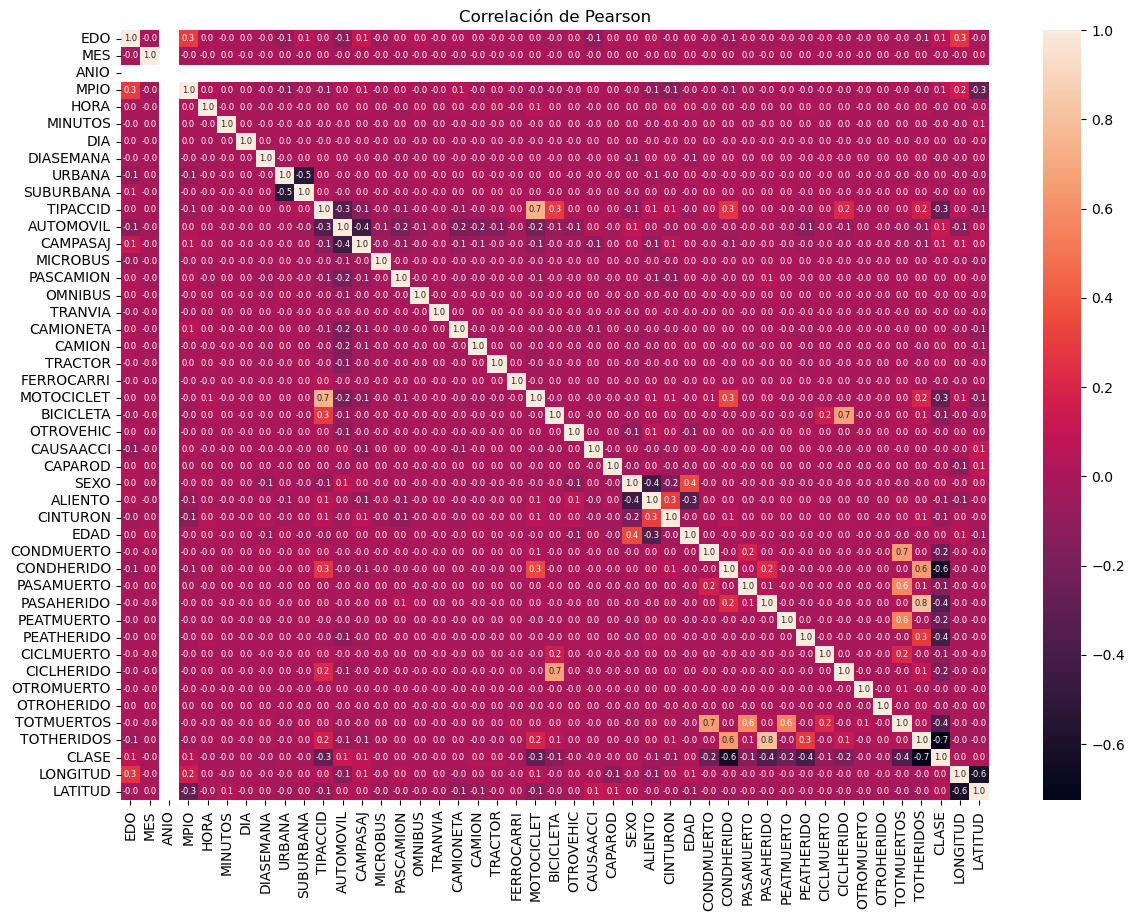

In [26]:
df_corr = df.drop('CALLE1', axis=1)
corr = df_corr.corr(method='pearson')

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".1f", annot_kws={"size": 6})
plt.title("Correlación de Pearson")

plt.show()

In [27]:
corr_filtered = corr[(corr > 0.6) | (corr < -0.6)]

corr_filtered = corr_filtered.where(~np.eye(corr.shape[0], dtype=bool))

corr_filtered = corr_filtered.dropna(how='all').dropna(how='all', axis=1)

html_corr = create_scrolleable_table(corr_filtered, 'correlaciones', 'Correlaciones')

display(HTML(html_corr))

,TIPACCID,MOTOCICLET,BICICLETA,CONDMUERTO,CONDHERIDO,PASAHERIDO,CICLHERIDO,TOTMUERTOS,TOTHERIDOS,CLASE,LONGITUD,LATITUD
TIPACCID,NaN,0.745232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MOTOCICLET,0.745232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BICICLETA,NaN,NaN,NaN,NaN,NaN,NaN,0.674303,NaN,NaN,NaN,NaN,NaN
CONDMUERTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.652556,NaN,NaN,NaN,NaN
CONDHERIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.645830,-0.649067,NaN,NaN
PASAHERIDO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.808474,NaN,NaN,NaN
CICLHERIDO,NaN,NaN,0.674303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOTMUERTOS,NaN,NaN,NaN,0.652556,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TOTHERIDOS,NaN,NaN,NaN,NaN,0.645830,0.808474,NaN,NaN,NaN,-0.726159,NaN,NaN
CLASE,NaN,NaN,NaN,NaN,-0.649067,NaN,NaN,NaN,-0.726159,NaN,NaN,NaN


In [28]:
print("Columnas con mayores correlaciones:")
print(corr_filtered.columns)

Columnas con mayores correlaciones:
Index(['TIPACCID', 'MOTOCICLET', 'BICICLETA', 'CONDMUERTO', 'CONDHERIDO',
       'PASAHERIDO', 'CICLHERIDO', 'TOTMUERTOS', 'TOTHERIDOS', 'CLASE',
       'LONGITUD', 'LATITUD'],
      dtype='object')


In [29]:
clase_mapping = {1: 'Fatal', 2: 'No fatal', 3: 'Sólo daños'}

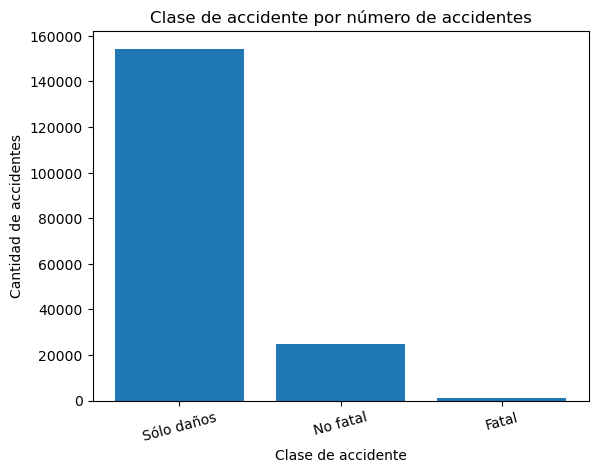

In [55]:
clase_counts = df['CLASE'].map(clase_mapping).value_counts()

plt.bar(clase_counts.index, clase_counts.values)
plt.title("Clase de accidente por número de accidentes")
plt.xlabel("Clase de accidente")
plt.xticks(rotation=15)
plt.ylabel("Cantidad de accidentes")

plt.show()

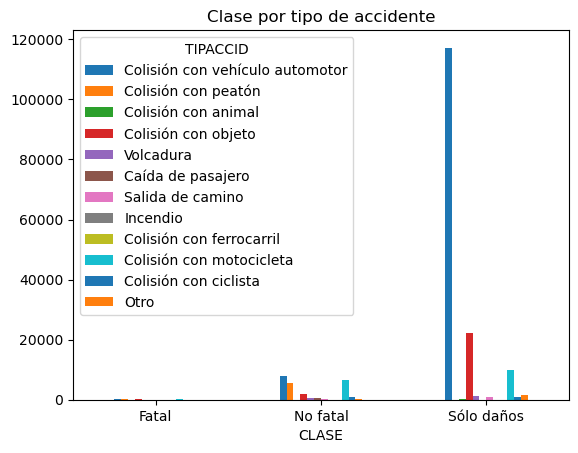

In [30]:
tipaccid_mapping = {
    0: 'Certificado 0', 1: 'Colisión con vehículo automotor', 2: 'Colisión con peatón', 
    3: 'Colisión con animal', 4: 'Colisión con objeto', 5: 'Volcadura', 6: 'Caída de pasajero', 
    7: 'Salida de camino', 8: 'Incendio', 9: 'Colisión con ferrocarril', 
    10: 'Colisión con motocicleta', 11: 'Colisión con ciclista', 12: 'Otro'
}

clase_tipaccid = df.groupby('TIPACCID')['CLASE'].value_counts()

#Asignar mapeo de clase y tipo
clase_tipaccid.index = clase_tipaccid.index.set_levels(
    clase_tipaccid.index.levels[0].map(tipaccid_mapping), level=0
)
clase_tipaccid.index = clase_tipaccid.index.set_levels(
    clase_tipaccid.index.levels[1].map(clase_mapping), level=1
)

# Filtro para no mostrar el caso de "Sólo daños"
# clase_tipaccid = clase_causa[clase_causa.index.get_level_values(1) != 'Sólo daños']

clase_tipaccid.unstack(level=0).plot.bar()
plt.xticks(rotation=0)
plt.title("Clase por tipo de accidente")

plt.show()

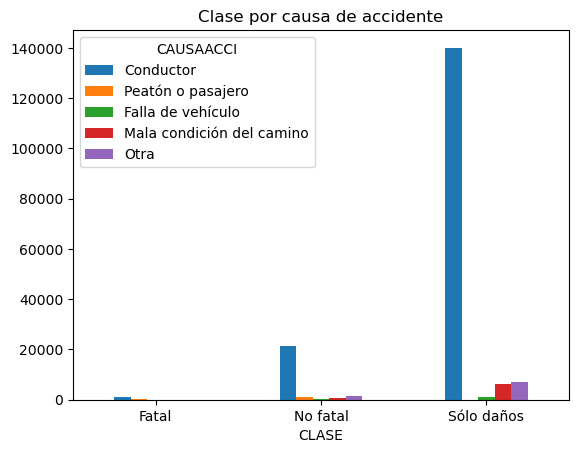

In [31]:
causa_mapping = {
    1: 'Conductor', 2: 'Peatón o pasajero', 3: 'Falla de vehículo', 4: 'Mala condición del camino', 5: 'Otra'
}

clase_causa = df.groupby('CAUSAACCI')['CLASE'].value_counts()

# Asignar mapeo de clase y causa 
clase_causa.index = clase_causa.index.set_levels(
    clase_causa.index.levels[0].map(causa_mapping), level=0
)
clase_causa.index = clase_causa.index.set_levels(
    clase_causa.index.levels[1].map(clase_mapping), level=1
)

# Filtro para no mostrar el caso de "Sólo daños"
# clase_causa = clase_causa[clase_causa.index.get_level_values(1) != 'Sólo daños']

clase_causa.unstack(level=0).plot.bar()
plt.xticks(rotation=0)
plt.title("Clase por causa de accidente")

plt.show()

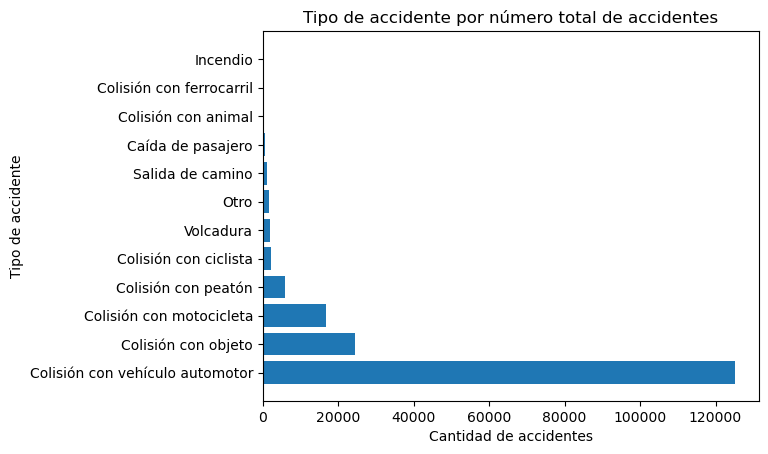

In [32]:
tipaccid_counts = df['TIPACCID'].map(tipaccid_mapping).value_counts()

plt.barh(tipaccid_counts.index, tipaccid_counts.values)
plt.title("Tipo de accidente por número total de accidentes")
plt.xlabel("Cantidad de accidentes")
plt.ylabel("Tipo de accidente")

plt.show()

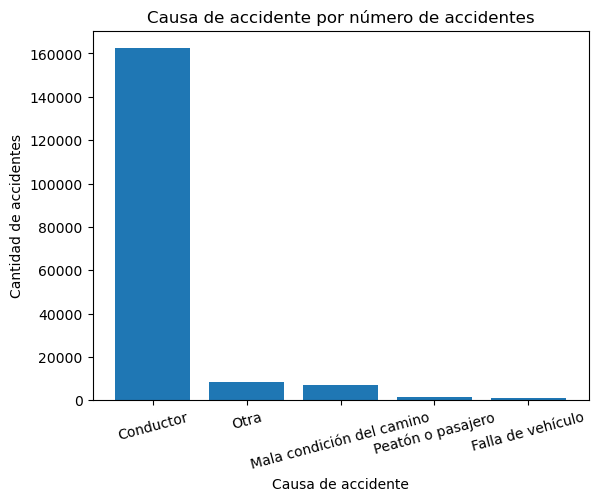

In [53]:
causa_mapping = {
    1: 'Conductor', 2: 'Peatón o pasajero', 3: 'Falla de vehículo', 4: 'Mala condición del camino', 5: 'Otra'
}

causa_counts = df['CAUSAACCI'].map(causa_mapping).value_counts()

plt.bar(causa_counts.index, causa_counts.values)
plt.title("Causa de accidente por número de accidentes")
plt.xlabel("Causa de accidente")
plt.xticks(rotation=15)
plt.ylabel("Cantidad de accidentes")

plt.show()